# Bootcamp Engenheiro(a) de Machine Learning

## Módulo 2 - Modelos Preditivos e Séries Temporais

## Bike Sharing Demand

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Data Reading

df = pd.read_csv('bike-sharing.csv')


,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

None

datetime             0
rec_id               0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64


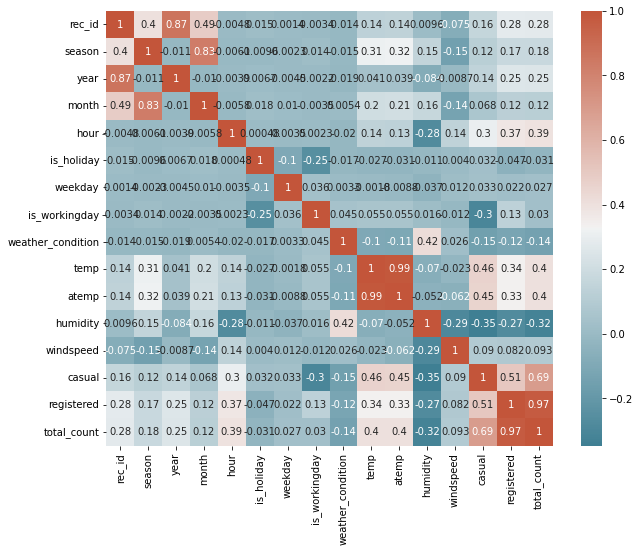

In [3]:
# Exploratory Data Analysis

# Dataframe
display(df)

# Generate descriptive statistics
display(df.describe())

# Concise summary
display(df.info())

# Missing values
print(df.isna().sum())

# Correlation matrix
corr = df.corr()
plt.subplots(figsize=(10,8));
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True));


In [4]:
# Processing

df['datetime'] = df['datetime'].apply(pd.to_datetime)


In [5]:
# Records in 2011

print((df['year'] == 0).sum())

# Records in 2012

print((df['year'] == 1).sum())

# Bike rentals in 2011

print(df.loc[df['year'] == 0, 'total_count'].sum())

# Bike rentals in 2012

print(df.loc[df['year'] == 1, 'total_count'].sum())

# Average leases by seasons of the year

display(df.groupby('season')['total_count'].mean())

# Average leases by time of day

display(df.groupby('hour')['total_count'].mean())

# Average leases by days of the week

display(df.groupby('weekday')['total_count'].mean())

# Average rentals by time on Wednesdays

display(df[df['weekday'] == 3].groupby('hour')['total_count'].mean())

# Average rentals by time on Saturdays

display(df[df['weekday'] == 6].groupby('hour')['total_count'].mean())


8645
8734
1243103
2049576


season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: total_count, dtype: float64

hour
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: total_count, dtype: float64

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: total_count, dtype: float64

hour
0      34.557692
1      15.336538
2       7.813725
3       4.888889
4       4.968750
5      25.750000
6     107.807692
7     303.980769
8     488.326923
9     238.528846
10    131.894231
11    152.201923
12    193.903846
13    185.826923
14    170.548077
15    181.288462
16    272.961538
17    513.144231
18    494.029126
19    357.504854
20    256.660194
21    194.669903
22    143.689320
23     83.737864
Name: total_count, dtype: float64

hour
0      94.304762
1      67.780952
2      50.495238
3      22.885714
4       7.657143
5       8.291262
6      21.000000
7      45.961905
8     114.476190
9     186.790476
10    263.723810
11    328.609524
12    375.380952
13    385.371429
14    381.333333
15    382.428571
16    366.142857
17    334.409524
18    292.048077
19    239.932692
20    180.865385
21    156.000000
22    139.663462
23    115.855769
Name: total_count, dtype: float64